<a href="https://colab.research.google.com/github/naveen-kumar-123/10-Days-of-Statistics--HackerRank/blob/master/Data%20Pre-Processing/Pre_Processing_of_Numerical_Variables_(KNN_imputed).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Getting the data from Google Drive

In [1]:
# # Load the Drive helper and mount
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
# importing dependencies & required libraries

import pandas as pd
pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', 100)
# pd.set_option('display.width', 1000)


import numpy as np


import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [0]:
air_bnb = pd.read_csv("drive/My Drive/Colab Notebooks/air_bnb_price_prediction(Kaggle)/Data/airbnb.csv")
air_bnb.head()

,id,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,city,description,first_review,host_has_profile_pic,host_identity_verified,host_response_rate,host_since,instant_bookable,last_review,latitude,longitude,name,neighbourhood,number_of_reviews,review_scores_rating,thumbnail_url,zipcode,bedrooms,beds
0,6901257,5.010635,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",3,1.0,Real Bed,strict,True,NYC,"Beautiful, sunlit brownstone 1-bedroom in the ...",2016-06-18,t,t,NaN,2012-03-26,f,2016-07-18,40.696524,-73.991617,Beautiful brownstone 1-bedroom,Brooklyn Heights,2,100.0,https://a0.muscache.com/im/pictures/6d7cbbf7-c...,11201,1.0,1.0
1,6304928,5.129899,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",7,1.0,Real Bed,strict,True,NYC,Enjoy travelling during your stay in Manhattan...,2017-08-05,t,f,100%,2017-06-19,t,2017-09-23,40.766115,-73.989040,Superb 3BR Apt Located Near Times Square,Hell's Kitchen,6,93.0,https://a0.muscache.com/im/pictures/348a55fe-4...,10019,3.0,3.0
2,7919400,4.976734,Apartment,Entire home/apt,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",5,1.0,Real Bed,moderate,True,NYC,The Oasis comes complete with a full backyard ...,2017-04-30,t,t,100%,2016-10-25,t,2017-09-14,40.808110,-73.943756,The Garden Oasis,Harlem,10,92.0,https://a0.muscache.com/im/pictures/6fae5362-9...,10027,1.0,3.0
3,13418779,6.620073,House,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",4,1.0,Real Bed,flexible,True,SF,This light-filled home-away-from-home is super...,NaN,t,t,NaN,2015-04-19,f,NaN,37.772004,-122.431619,Beautiful Flat in the Heart of SF!,Lower Haight,0,NaN,https://a0.muscache.com/im/pictures/72208dad-9...,94117.0,2.0,2.0
4,3808709,4.744932,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",2,1.0,Real Bed,moderate,True,DC,"Cool, cozy, and comfortable studio located in ...",2015-05-12,t,t,100%,2015-03-01,t,2017-01-22,38.925627,-77.034596,Great studio in midtown DC,Columbia Heights,4,40.0,NaN,20009,0.0,1.0


In [0]:
air_bnb.dtypes[air_bnb.dtypes != 'object'][air_bnb.dtypes != 'bool']

id                        int64
log_price               float64
accommodates              int64
bathrooms               float64
latitude                float64
longitude               float64
number_of_reviews         int64
review_scores_rating    float64
bedrooms                float64
beds                    float64
dtype: object

In [0]:
np.asarray(air_bnb.columns.values)

array(['id', 'log_price', 'property_type', 'room_type', 'amenities',
       'accommodates', 'bathrooms', 'bed_type', 'cancellation_policy',
       'cleaning_fee', 'city', 'description', 'first_review',
       'host_has_profile_pic', 'host_identity_verified',
       'host_response_rate', 'host_since', 'instant_bookable',
       'last_review', 'latitude', 'longitude', 'name', 'neighbourhood',
       'number_of_reviews', 'review_scores_rating', 'thumbnail_url',
       'zipcode', 'bedrooms', 'beds'], dtype=object)

In [0]:
# inspection also reveals that, in addition to above columns, there is also a column named "host_response_rate"
air_bnb_num = air_bnb.loc[:,['id', 'log_price','accommodates', 'bathrooms','host_response_rate',
                            'number_of_reviews', 'review_scores_rating','bedrooms', 'beds']]
air_bnb_num.head()

,id,log_price,accommodates,bathrooms,host_response_rate,number_of_reviews,review_scores_rating,bedrooms,beds
0,6901257,5.010635,3,1.0,NaN,2,100.0,1.0,1.0
1,6304928,5.129899,7,1.0,100%,6,93.0,3.0,3.0
2,7919400,4.976734,5,1.0,100%,10,92.0,1.0,3.0
3,13418779,6.620073,4,1.0,NaN,0,NaN,2.0,2.0
4,3808709,4.744932,2,1.0,100%,4,40.0,0.0,1.0


In [0]:
air_bnb_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74111 entries, 0 to 74110
Data columns (total 9 columns):
id                      74111 non-null int64
log_price               74111 non-null float64
accommodates            74111 non-null int64
bathrooms               73911 non-null float64
host_response_rate      55812 non-null object
number_of_reviews       74111 non-null int64
review_scores_rating    57389 non-null float64
bedrooms                74020 non-null float64
beds                    73980 non-null float64
dtypes: float64(5), int64(3), object(1)
memory usage: 5.1+ MB


In [0]:
air_bnb_num.set_index("id")

,log_price,accommodates,bathrooms,host_response_rate,number_of_reviews,review_scores_rating,bedrooms,beds
id,,,,,,,,
6901257,5.010635,3,1.0,NaN,2,100.0,1.0,1.0
6304928,5.129899,7,1.0,100%,6,93.0,3.0,3.0
7919400,4.976734,5,1.0,100%,10,92.0,1.0,3.0
13418779,6.620073,4,1.0,NaN,0,NaN,2.0,2.0
3808709,4.744932,2,1.0,100%,4,40.0,0.0,1.0
12422935,4.442651,2,1.0,100%,3,100.0,1.0,1.0
11825529,4.418841,3,1.0,100%,15,97.0,1.0,1.0
13971273,4.787492,2,1.0,100%,9,93.0,1.0,1.0
180792,4.787492,2,1.0,100%,159,99.0,1.0,1.0


# removing percentage symbols from `host_response_rate` column and converting to plain numbers(e.g., 100% becomes 1.0 and 58 becomes 0.58)

In [0]:
air_bnb_num.loc[:,"host_response_rate"][:10]

0     NaN
1    100%
2    100%
3     NaN
4    100%
5    100%
6    100%
7    100%
8    100%
9    100%
Name: host_response_rate, dtype: object

In [0]:
type(air_bnb_num["host_response_rate"][1])

str

In [0]:
def remove_percent_symbols(a_list):
    list_without_percents = []
    for x in a_list:
        if type(x) == str:
            list_without_percents.append(np.float64(x[:-1]))
        else:
            list_without_percents.append(np.NaN)
    return np.asarray(list_without_percents).flatten()

In [0]:
a_list = remove_percent_symbols(air_bnb_num.loc[:,"host_response_rate"])
a_list[:10]

array([ nan, 100., 100.,  nan, 100., 100., 100., 100., 100., 100.])

In [0]:
air_bnb_num.loc[:,"host_response_rate"] = a_list
air_bnb_num.head()

,id,log_price,accommodates,bathrooms,host_response_rate,number_of_reviews,review_scores_rating,bedrooms,beds
0,6901257,5.010635,3,1.0,NaN,2,100.0,1.0,1.0
1,6304928,5.129899,7,1.0,100.0,6,93.0,3.0,3.0
2,7919400,4.976734,5,1.0,100.0,10,92.0,1.0,3.0
3,13418779,6.620073,4,1.0,NaN,0,NaN,2.0,2.0
4,3808709,4.744932,2,1.0,100.0,4,40.0,0.0,1.0


In [0]:
def percent_to_numbers(a_list):
    list_in_numbers = []
    for x in a_list:
        if type(x) == float:
            list_in_numbers.append(np.float64(x/100))
        else:
            list_in_numbers.append(np.NaN)
    return np.asarray(list_in_numbers).flatten()

In [0]:
another_list = percent_to_numbers(air_bnb_num.loc[:,"host_response_rate"])
another_list[:20]

array([ nan, 1.  , 1.  ,  nan, 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  ,
       1.  ,  nan, 1.  , 1.  , 1.  ,  nan, 1.  , 0.71, 1.  ])

In [0]:
air_bnb_num.loc[:,"host_response_rate"] = another_list
air_bnb_num.head()

,id,log_price,accommodates,bathrooms,host_response_rate,number_of_reviews,review_scores_rating,bedrooms,beds
0,6901257,5.010635,3,1.0,NaN,2,100.0,1.0,1.0
1,6304928,5.129899,7,1.0,1.0,6,93.0,3.0,3.0
2,7919400,4.976734,5,1.0,1.0,10,92.0,1.0,3.0
3,13418779,6.620073,4,1.0,NaN,0,NaN,2.0,2.0
4,3808709,4.744932,2,1.0,1.0,4,40.0,0.0,1.0


In [0]:
air_bnb_num["host_response_rate"] = percent_to_numbers(air_bnb_num["host_response_rate"])
air_bnb_num.head()

,id,log_price,accommodates,bathrooms,host_response_rate,number_of_reviews,review_scores_rating,bedrooms,beds
0,6901257,5.010635,3,1.0,NaN,2,100.0,1.0,1.0
1,6304928,5.129899,7,1.0,1.0,6,93.0,3.0,3.0
2,7919400,4.976734,5,1.0,1.0,10,92.0,1.0,3.0
3,13418779,6.620073,4,1.0,NaN,0,NaN,2.0,2.0
4,3808709,4.744932,2,1.0,1.0,4,40.0,0.0,1.0


# Scaling the data for KNN

In [0]:
# i'm first gonna try to scale and get the original data and see how that works

In [0]:
from sklearn.preprocessing import MinMaxScaler
min_max = MinMaxScaler()

In [0]:
np.asarray(air_bnb_num.columns.values)

array(['id', 'log_price', 'accommodates', 'bathrooms',
       'host_response_rate', 'number_of_reviews', 'review_scores_rating',
       'bedrooms', 'beds'], dtype=object)

In [0]:
normalizer_max = min_max.fit(air_bnb_num[['log_price', 'accommodates', 'bathrooms',
                                          'host_response_rate', 'number_of_reviews', 
                                          'review_scores_rating', 'bedrooms', 'beds']])
normalizer_max

C:\Users\neevaN_Reddy\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


MinMaxScaler(copy=True, feature_range=(0, 1))

In [0]:
# transform now
air_bnb_scaled = normalizer_max.transform(air_bnb_num[['log_price', 'accommodates', 'bathrooms',
                                                       'host_response_rate', 'number_of_reviews', 
                                                       'review_scores_rating', 'bedrooms', 'beds']])

In [0]:
air_bnb_columns = list(air_bnb_num.columns.values)
# since our scaled dataframe doesn't have "id" column. let's drop that
air_bnb_columns.remove("id")
air_bnb_columns

['log_price',
 'accommodates',
 'bathrooms',
 'host_response_rate',
 'number_of_reviews',
 'review_scores_rating',
 'bedrooms',
 'beds']

In [0]:
air_bnb_scaled = pd.DataFrame(data=air_bnb_scaled,
                              columns=air_bnb_columns,
                              index=air_bnb_num["id"])
air_bnb_scaled.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 74111 entries, 6901257 to 3534845
Data columns (total 8 columns):
log_price               74111 non-null float64
accommodates            74111 non-null float64
bathrooms               73911 non-null float64
host_response_rate      55812 non-null float64
number_of_reviews       74111 non-null float64
review_scores_rating    57389 non-null float64
bedrooms                74020 non-null float64
beds                    73980 non-null float64
dtypes: float64(8)
memory usage: 5.1 MB


In [0]:
print(air_bnb_scaled["accommodates"].min())
print(air_bnb_scaled["accommodates"].max())

0.0
1.0


In [0]:
air_bnb_scaled.head()

,log_price,accommodates,bathrooms,host_response_rate,number_of_reviews,review_scores_rating,bedrooms,beds
id,,,,,,,,
6901257,0.659259,0.133333,0.125,NaN,0.003306,1.0000,0.1,0.055556
6304928,0.674951,0.400000,0.125,1.0,0.009917,0.9125,0.3,0.166667
7919400,0.654799,0.266667,0.125,1.0,0.016529,0.9000,0.1,0.166667
13418779,0.871016,0.200000,0.125,NaN,0.000000,NaN,0.2,0.111111
3808709,0.624300,0.066667,0.125,1.0,0.006612,0.2500,0.0,0.055556


In [0]:
original_data = pd.DataFrame(data=normalizer_max.inverse_transform(air_bnb_scaled),
                              columns=air_bnb_columns,
                              index=air_bnb_num["id"])
original_data.head()

,log_price,accommodates,bathrooms,host_response_rate,number_of_reviews,review_scores_rating,bedrooms,beds
id,,,,,,,,
6901257,5.010635,3.0,1.0,NaN,2.0,100.0,1.0,1.0
6304928,5.129899,7.0,1.0,1.0,6.0,93.0,3.0,3.0
7919400,4.976734,5.0,1.0,1.0,10.0,92.0,1.0,3.0
13418779,6.620073,4.0,1.0,NaN,0.0,NaN,2.0,2.0
3808709,4.744932,2.0,1.0,1.0,4.0,40.0,0.0,1.0


In [0]:
air_bnb_num.head()

,id,log_price,accommodates,bathrooms,host_response_rate,number_of_reviews,review_scores_rating,bedrooms,beds
0,6901257,5.010635,3,1.0,NaN,2,100.0,1.0,1.0
1,6304928,5.129899,7,1.0,1.0,6,93.0,3.0,3.0
2,7919400,4.976734,5,1.0,1.0,10,92.0,1.0,3.0
3,13418779,6.620073,4,1.0,NaN,0,NaN,2.0,2.0
4,3808709,4.744932,2,1.0,1.0,4,40.0,0.0,1.0


In [0]:
# air_bnb_scaled.to_csv("air_bnb_num_scaled_no_imputation.csv")

# KNN imputation

In [0]:
# let's find K to train KNN
# from formula sqrt(n), K can be less than 
def appropriate_k(x_train,x_test,y_train,y_test,k_max):
    '''
    this function takes x & y train & test dataframes,
    fits KNN with a different K value each time to the data;
    And MSE will be calcuated comparing the predictions to test data
    and returns the K value that has less MSE
    '''
    from sklearn.neighbors import KNeighborsRegressor
    from sklearn.metrics import mean_squared_error
    
    k_list = []
    mse_list = []
    
    for i in range(10,k_max):
        knn = KNeighborsRegressor(n_neighbors=i)
        knn_model = knn.fit(x_train,y_train)
        knn_pred = knn_model.predict(x_test)
        mse = mean_squared_error(y_test,knn_pred)
        k_list.append(i)
        mse_list.append(mse)
        
    return k_list[mse_list.index(min(mse_list))]

In [0]:
def get_knn_predictions(x_train,y_train,x_test,n_neigh):
    '''
    this function takes train data for x & y and test data of x and no_of_neighbors for KNN,
    and fits KNN to the data
    and returns the numpy array of predictions
    '''
    from sklearn.neighbors import KNeighborsRegressor
    from numpy import asarray
    
    knn_model = KNeighborsRegressor(n_neighbors=n_neigh)
    model = knn_model.fit(x_train, y_train)
    predictions_list = asarray(model.predict(x_test)).flatten()
    return predictions_list

In [0]:
air_bnb_scaled.head()

,log_price,accommodates,bathrooms,host_response_rate,number_of_reviews,review_scores_rating,bedrooms,beds
id,,,,,,,,
6901257,0.659259,0.133333,0.125,NaN,0.003306,1.0000,0.1,0.055556
6304928,0.674951,0.400000,0.125,1.0,0.009917,0.9125,0.3,0.166667
7919400,0.654799,0.266667,0.125,1.0,0.016529,0.9000,0.1,0.166667
13418779,0.871016,0.200000,0.125,NaN,0.000000,NaN,0.2,0.111111
3808709,0.624300,0.066667,0.125,1.0,0.006612,0.2500,0.0,0.055556


In [0]:
air_bnb_num.isna().sum()

In [0]:
air_bnb_with_null    = air_bnb_scaled.copy()
air_bnb_without_null = air_bnb_with_null.dropna()

In [0]:
air_bnb_with_null.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 74111 entries, 6901257 to 3534845
Data columns (total 8 columns):
log_price               74111 non-null float64
accommodates            74111 non-null float64
bathrooms               73911 non-null float64
host_response_rate      55812 non-null float64
number_of_reviews       74111 non-null float64
review_scores_rating    57389 non-null float64
bedrooms                74020 non-null float64
beds                    73980 non-null float64
dtypes: float64(8)
memory usage: 5.1 MB


# let's start with imputing `bedrooms` column, since it is the one that has lowest number of null values

In [0]:
# make train and test dataframes to find appropriate K value
from sklearn.model_selection import train_test_split

bedroom_x_train, bedroom_x_test, bedroom_y_train, bedroom_y_test = train_test_split(air_bnb_without_null[["log_price","accommodates","number_of_reviews"]],
                                                                                    air_bnb_without_null['bedrooms'],
                                                                                   test_size=0.2)

In [0]:
print(bedroom_x_train.shape)
print(bedroom_x_test.shape)
print(bedroom_y_train.shape)
print(bedroom_y_test.shape)

(38229, 3)
(9558, 3)
(38229,)
(9558,)


In [0]:
appropriate_k(x_train=bedroom_x_train,x_test=bedroom_x_test,y_train=bedroom_y_train,y_test=bedroom_y_test,k_max=300)

137

In [0]:
air_bnb_with_null.isnull().sum()

log_price                   0
accommodates                0
bathrooms                 200
host_response_rate      18299
number_of_reviews           0
review_scores_rating    16722
bedrooms                   91
beds                      131
dtype: int64

**the approach I'm gonna take is:**  
**first impute the column with less null values and then go on imputing columns as such**

1. Impute `bedrooms` from `accomodates`, `number_of_reviews` and `log_price` columns

In [0]:
bedroom_train_x = air_bnb_without_null.loc[:,["log_price","accommodates","number_of_reviews"]]
bedroom_train_y = air_bnb_without_null.loc[:,"bedrooms"]


bedroom_test = air_bnb_with_null.loc[:,["log_price","accommodates","number_of_reviews"]]

In [0]:
air_bnb_with_null.isnull().sum()

log_price                   0
accommodates                0
bathrooms                   0
host_response_rate      18299
number_of_reviews           0
review_scores_rating    16722
bedrooms                    0
beds                      131
dtype: int64

In [0]:
a_list = get_knn_predictions(x_train=bedroom_train_x,y_train=bedroom_train_y,x_test=bedroom_test,n_neigh=137)

In [0]:
a_list[:10]

array([0.09677419, 0.23010753, 0.15698925, 0.19462366, 0.07849462,
       0.08924731, 0.07849462, 0.08709677, 0.08709677, 0.10322581])

In [0]:
bedroom_test.loc[:,"bedrooms"] = a_list
bedroom_test.head()

,log_price,accommodates,number_of_reviews,bedrooms
id,,,,
6901257,0.659259,0.133333,0.003306,0.098540
6304928,0.674951,0.400000,0.009917,0.240146
7919400,0.654799,0.266667,0.016529,0.175912
13418779,0.871016,0.200000,0.000000,0.190511
3808709,0.624300,0.066667,0.006612,0.082482


In [0]:
air_bnb_with_null.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 74111 entries, 6901257 to 3534845
Data columns (total 8 columns):
log_price               74111 non-null float64
accommodates            74111 non-null float64
bathrooms               74111 non-null float64
host_response_rate      55812 non-null float64
number_of_reviews       74111 non-null float64
review_scores_rating    57389 non-null float64
bedrooms                74111 non-null float64
beds                    73980 non-null float64
dtypes: float64(8)
memory usage: 5.1 MB


In [0]:
# now let's replace only the missing values 
air_bnb_with_null["bedrooms"].fillna(bedroom_test["bedrooms"], inplace=True)
air_bnb_with_null.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 74111 entries, 6901257 to 3534845
Data columns (total 8 columns):
log_price               74111 non-null float64
accommodates            74111 non-null float64
bathrooms               73911 non-null float64
host_response_rate      55812 non-null float64
number_of_reviews       74111 non-null float64
review_scores_rating    57389 non-null float64
bedrooms                74111 non-null float64
beds                    73980 non-null float64
dtypes: float64(8)
memory usage: 5.1 MB


C:\Users\neevaN_Reddy\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\neevaN_Reddy\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


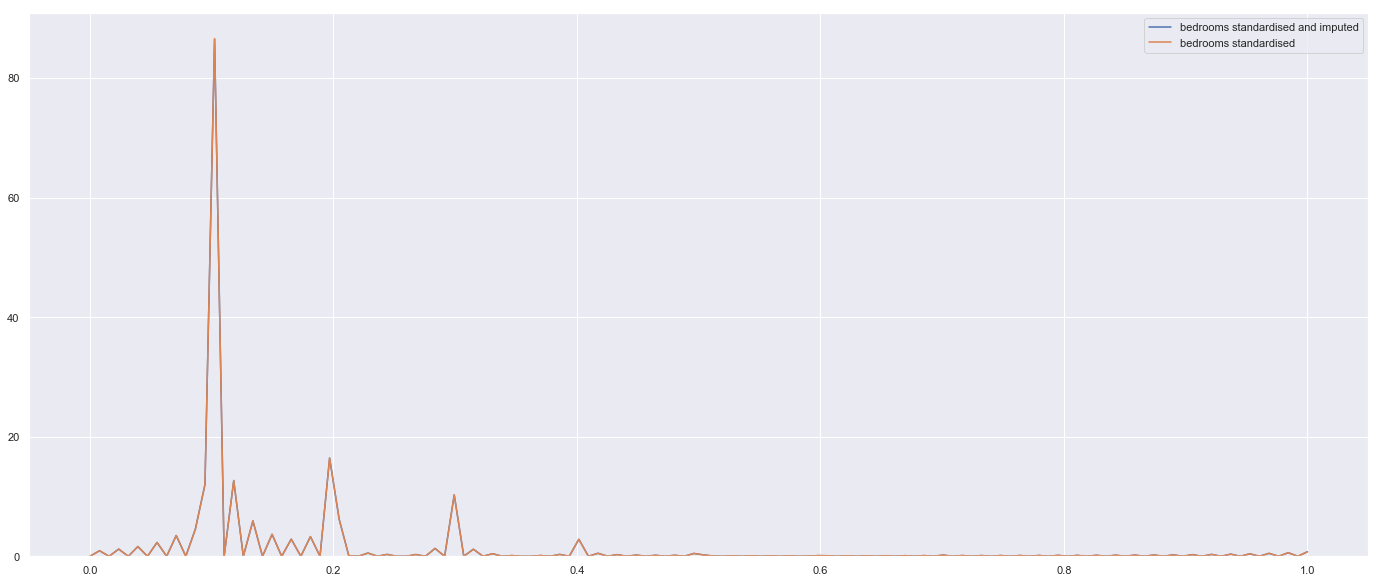

In [0]:
# comparing distributions

sns.set(rc={'figure.figsize':(24,10)})


sns.kdeplot(air_bnb_with_null.loc[:,"bedrooms"], label="bedrooms standardised and imputed")
sns.kdeplot(air_bnb_scaled.loc[:,"bedrooms"], label="bedrooms standardised")

plt.legend()
plt.show()

In [0]:
air_bnb_with_null.isnull().sum()

log_price                   0
accommodates                0
bathrooms                   0
host_response_rate      18299
number_of_reviews           0
review_scores_rating    16722
bedrooms                    0
beds                      131
dtype: int64

# imputing `bathrooms` column

In [0]:
air_bnb_with_null.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 74111 entries, 6901257 to 3534845
Data columns (total 8 columns):
log_price               74111 non-null float64
accommodates            74111 non-null float64
bathrooms               73911 non-null float64
host_response_rate      55812 non-null float64
number_of_reviews       74111 non-null float64
review_scores_rating    57389 non-null float64
bedrooms                74111 non-null float64
beds                    73980 non-null float64
dtypes: float64(8)
memory usage: 5.1 MB


In [0]:
air_bnb_without_null.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47787 entries, 6304928 to 3534845
Data columns (total 8 columns):
log_price               47787 non-null float64
accommodates            47787 non-null float64
bathrooms               47787 non-null float64
host_response_rate      47787 non-null float64
number_of_reviews       47787 non-null float64
review_scores_rating    47787 non-null float64
bedrooms                47787 non-null float64
beds                    47787 non-null float64
dtypes: float64(8)
memory usage: 3.3 MB


In [0]:
# let's now knn impute `bathrooms` based on `log_price`, `accomodates`, `number_of_reviews` and `bedrooms`

In [0]:
# from sklearn.model_selection import train_test_split
bathroom_x_train, bathroom_x_test, bathroom_y_train, bathroom_y_test = train_test_split(air_bnb_without_null.loc[:,["log_price", "accommodates", "bedrooms", "number_of_reviews"]],
                                                                                        air_bnb_without_null.loc[:,"bathrooms"],
                                                                                        test_size=0.2)

In [0]:
print(bathroom_x_train.shape)
print(bathroom_x_test.shape)

(38229, 4)
(9558, 4)


In [0]:
38229+9558

47787

In [0]:
# from math import sqrt
sqrt(73911)

271.86577570558603

In [0]:
appropriate_k(x_train=bathroom_x_train,x_test=bathroom_x_test,y_train=bathroom_y_train,y_test=bathroom_y_test,k_max=273)

48

In [0]:
# creating train & test dataframes for selecting K for KNN and also for filling null values

bathrooms_train_x = air_bnb_without_null.loc[:,["log_price", "accommodates", "bedrooms", "number_of_reviews"]]
bathrooms_train_y = air_bnb_without_null.loc[:,"bathrooms"]

bathrooms_test_x = air_bnb_with_null.loc[:,["log_price", "accommodates", "bedrooms", "number_of_reviews"]]

In [0]:
bathrooms_pred = get_knn_predictions(x_train=bathrooms_train_x,y_train=bathrooms_train_y,x_test=bathrooms_test_x,n_neigh=48)

In [0]:
bathrooms_pred[:20]

array([0.12890625, 0.22786458, 0.13541667, 0.24609375, 0.12369792,
       0.13671875, 0.12760417, 0.13541667, 0.13151042, 0.13411458,
       0.14322917, 0.14973958, 0.15885417, 0.19661458, 0.1484375 ,
       0.14583333, 0.13802083, 0.13802083, 0.12760417, 0.18619792])

In [0]:
bathrooms_test_x.loc[:,"bathrooms"] = bathrooms_pred
bathrooms_test_x.head()

,log_price,accommodates,bedrooms,number_of_reviews,bathrooms
id,,,,,
6901257,0.659259,0.133333,0.1,0.003306,0.128906
6304928,0.674951,0.400000,0.3,0.009917,0.227865
7919400,0.654799,0.266667,0.1,0.016529,0.135417
13418779,0.871016,0.200000,0.2,0.000000,0.246094
3808709,0.624300,0.066667,0.0,0.006612,0.123698


In [0]:
air_bnb_with_null.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 74111 entries, 6901257 to 3534845
Data columns (total 8 columns):
log_price               74111 non-null float64
accommodates            74111 non-null float64
bathrooms               73911 non-null float64
host_response_rate      55812 non-null float64
number_of_reviews       74111 non-null float64
review_scores_rating    57389 non-null float64
bedrooms                74111 non-null float64
beds                    73980 non-null float64
dtypes: float64(8)
memory usage: 5.1 MB


In [0]:
# now let's replace only the missing values 
air_bnb_with_null.loc[:,"bathrooms"].fillna(bathrooms_test_x.loc[:,"bathrooms"],inplace=True)
air_bnb_with_null.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 74111 entries, 6901257 to 3534845
Data columns (total 8 columns):
log_price               74111 non-null float64
accommodates            74111 non-null float64
bathrooms               74111 non-null float64
host_response_rate      55812 non-null float64
number_of_reviews       74111 non-null float64
review_scores_rating    57389 non-null float64
bedrooms                74111 non-null float64
beds                    73980 non-null float64
dtypes: float64(8)
memory usage: 5.1 MB


C:\Users\neevaN_Reddy\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\neevaN_Reddy\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


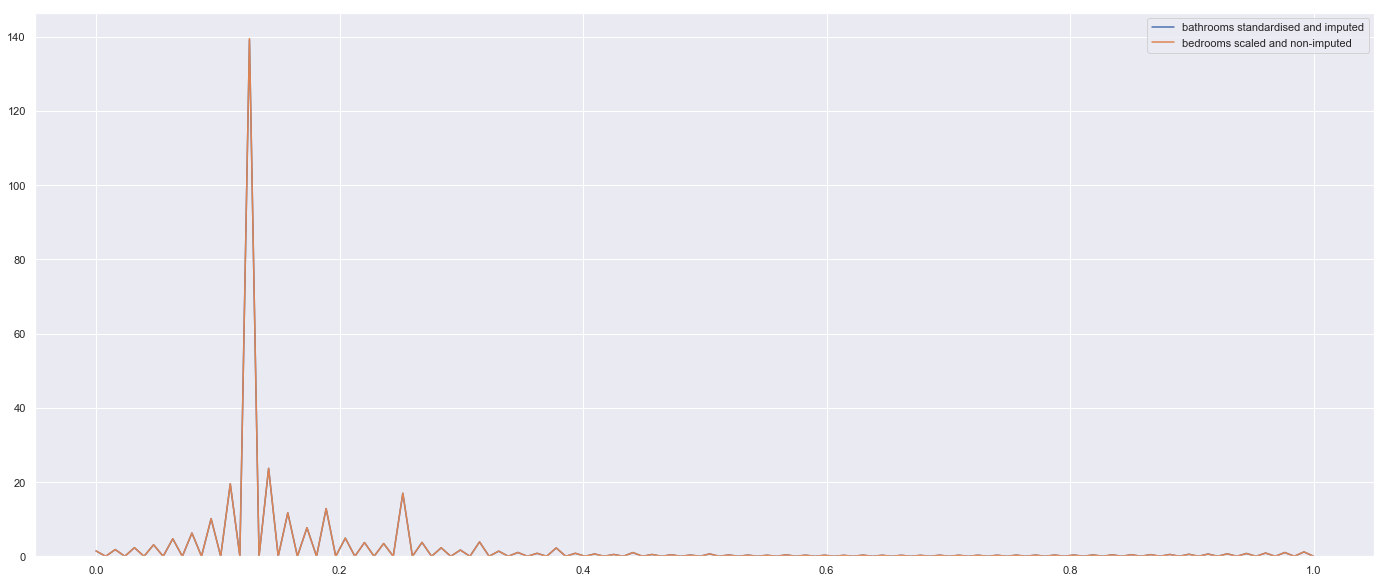

In [0]:
# check the distributions now

sns.set(rc={'figure.figsize':(24,10)})

sns.kdeplot(air_bnb_with_null.loc[:,"bathrooms"], label="bathrooms standardised and imputed")
sns.kdeplot(air_bnb_scaled.loc[:,"bathrooms"], label="bedrooms scaled and non-imputed")

plt.legend()
plt.show()

# imputing `beds` column

In [0]:
air_bnb_with_null.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 74111 entries, 6901257 to 3534845
Data columns (total 8 columns):
log_price               74111 non-null float64
accommodates            74111 non-null float64
bathrooms               74111 non-null float64
host_response_rate      55812 non-null float64
number_of_reviews       74111 non-null float64
review_scores_rating    57389 non-null float64
bedrooms                74111 non-null float64
beds                    73980 non-null float64
dtypes: float64(8)
memory usage: 5.1 MB


In [0]:
# from sklearn.model_selection import train_test_split
beds_x_train, beds_x_test, beds_y_train, beds_y_test = train_test_split(air_bnb_without_null.loc[:,["log_price", "accommodates", "bedrooms", "bathrooms","number_of_reviews"]],air_bnb_without_null.loc[:,"beds"],
                                                                                   test_size=0.2)

In [0]:
sqrt(73980)

271.99264695943526

In [0]:
appropriate_k(x_train=beds_x_train,x_test=beds_x_test,y_train=beds_y_train,y_test=beds_y_test,k_max=273)

20

In [0]:
# let's create train and test sets
beds_train_x = air_bnb_without_null.loc[:,["log_price", "accommodates", "bedrooms", "bathrooms","number_of_reviews"]]
beds_train_y = air_bnb_without_null.loc[:,"beds"]

beds_test = air_bnb_with_null.loc[:,["log_price", "accommodates", "bedrooms", "bathrooms","number_of_reviews"]]

In [0]:
beds_pred = get_knn_predictions(x_train=beds_train_x,y_train=beds_train_y,x_test=beds_test,n_neigh=20)

In [0]:
beds_test.loc[:,"beds"] = beds_pred
beds_test.head()

,log_price,accommodates,bedrooms,bathrooms,number_of_reviews,beds
id,,,,,,
6901257,0.659259,0.133333,0.1,0.125,0.003306,0.075000
6304928,0.674951,0.400000,0.3,0.125,0.009917,0.233333
7919400,0.654799,0.266667,0.1,0.125,0.016529,0.119444
13418779,0.871016,0.200000,0.2,0.125,0.000000,0.119444
3808709,0.624300,0.066667,0.0,0.125,0.006612,0.066667


In [0]:
air_bnb_with_null.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 74111 entries, 6901257 to 3534845
Data columns (total 8 columns):
log_price               74111 non-null float64
accommodates            74111 non-null float64
bathrooms               74111 non-null float64
host_response_rate      55812 non-null float64
number_of_reviews       74111 non-null float64
review_scores_rating    57389 non-null float64
bedrooms                74111 non-null float64
beds                    73980 non-null float64
dtypes: float64(8)
memory usage: 5.1 MB


In [0]:
# now let's replace only the missing values 
air_bnb_with_null.loc[:,"beds"].fillna(beds_test.loc[:,"beds"],inplace=True)
air_bnb_with_null.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 74111 entries, 6901257 to 3534845
Data columns (total 8 columns):
log_price               74111 non-null float64
accommodates            74111 non-null float64
bathrooms               74111 non-null float64
host_response_rate      55812 non-null float64
number_of_reviews       74111 non-null float64
review_scores_rating    57389 non-null float64
bedrooms                74111 non-null float64
beds                    74111 non-null float64
dtypes: float64(8)
memory usage: 5.1 MB


# imputing `review_scores_rating` column

In [0]:
air_bnb_with_null.isna().sum()

log_price                   0
accommodates                0
bathrooms                   0
host_response_rate      18299
number_of_reviews           0
review_scores_rating    16722
bedrooms                    0
beds                        0
dtype: int64

In [0]:
# from sklearn.model_selection import train_test_split
scores_x_train, scores_x_test, scores_y_train, scores_y_test = train_test_split(air_bnb_without_null.loc[:,["log_price","accommodates","bathrooms","number_of_reviews","bedrooms","beds"]],
                                                                                air_bnb_without_null.loc[:,"review_scores_rating"],
                                                                                test_size=0.2)

In [0]:
appropriate_k(x_train=scores_x_train,x_test=scores_x_test,y_train=scores_y_train,y_test=scores_y_test,k_max=273)

248

In [0]:
# creating train and test sets

scores_train_x = air_bnb_without_null.loc[:,["log_price","accommodates","bathrooms",
                                 "number_of_reviews","bedrooms","beds"]]
scores_train_y = air_bnb_without_null.loc[:,"review_scores_rating"]

scores_test = air_bnb_with_null.loc[:,["log_price","accommodates","bathrooms",
                                 "number_of_reviews","bedrooms","beds"]]

In [0]:
scores_pred = get_knn_predictions(x_train=scores_train_x,y_train=scores_train_y,x_test=scores_test,n_neigh=248)

In [0]:
scores_test.loc[:,"review_scores_rating"] = scores_pred
scores_test.head()

,log_price,accommodates,bathrooms,number_of_reviews,bedrooms,beds,review_scores_rating
id,,,,,,,
6901257,0.659259,0.133333,0.125,0.003306,0.1,0.055556,0.939919
6304928,0.674951,0.400000,0.125,0.009917,0.3,0.166667,0.914062
7919400,0.654799,0.266667,0.125,0.016529,0.1,0.166667,0.925151
13418779,0.871016,0.200000,0.125,0.000000,0.2,0.111111,0.933417
3808709,0.624300,0.066667,0.125,0.006612,0.0,0.055556,0.940121


In [0]:
air_bnb_with_null.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 74111 entries, 6901257 to 3534845
Data columns (total 8 columns):
log_price               74111 non-null float64
accommodates            74111 non-null float64
bathrooms               74111 non-null float64
host_response_rate      55812 non-null float64
number_of_reviews       74111 non-null float64
review_scores_rating    57389 non-null float64
bedrooms                74111 non-null float64
beds                    74111 non-null float64
dtypes: float64(8)
memory usage: 5.1 MB


In [0]:
# fill nas now
air_bnb_with_null.loc[:,"review_scores_rating"].fillna(scores_test.loc[:,"review_scores_rating"], inplace=True)
air_bnb_with_null.head()

,log_price,accommodates,bathrooms,host_response_rate,number_of_reviews,review_scores_rating,bedrooms,beds
id,,,,,,,,
6901257,0.659259,0.133333,0.125,NaN,0.003306,1.000000,0.1,0.055556
6304928,0.674951,0.400000,0.125,1.0,0.009917,0.912500,0.3,0.166667
7919400,0.654799,0.266667,0.125,1.0,0.016529,0.900000,0.1,0.166667
13418779,0.871016,0.200000,0.125,NaN,0.000000,0.933417,0.2,0.111111
3808709,0.624300,0.066667,0.125,1.0,0.006612,0.250000,0.0,0.055556


In [0]:
air_bnb_with_null.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 74111 entries, 6901257 to 3534845
Data columns (total 8 columns):
log_price               74111 non-null float64
accommodates            74111 non-null float64
bathrooms               74111 non-null float64
host_response_rate      55812 non-null float64
number_of_reviews       74111 non-null float64
review_scores_rating    74111 non-null float64
bedrooms                74111 non-null float64
beds                    74111 non-null float64
dtypes: float64(8)
memory usage: 5.1 MB


In [0]:
air_bnb_with_null.isna().sum()

log_price                   0
accommodates                0
bathrooms                   0
host_response_rate      18299
number_of_reviews           0
review_scores_rating        0
bedrooms                    0
beds                        0
dtype: int64

C:\Users\neevaN_Reddy\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\neevaN_Reddy\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


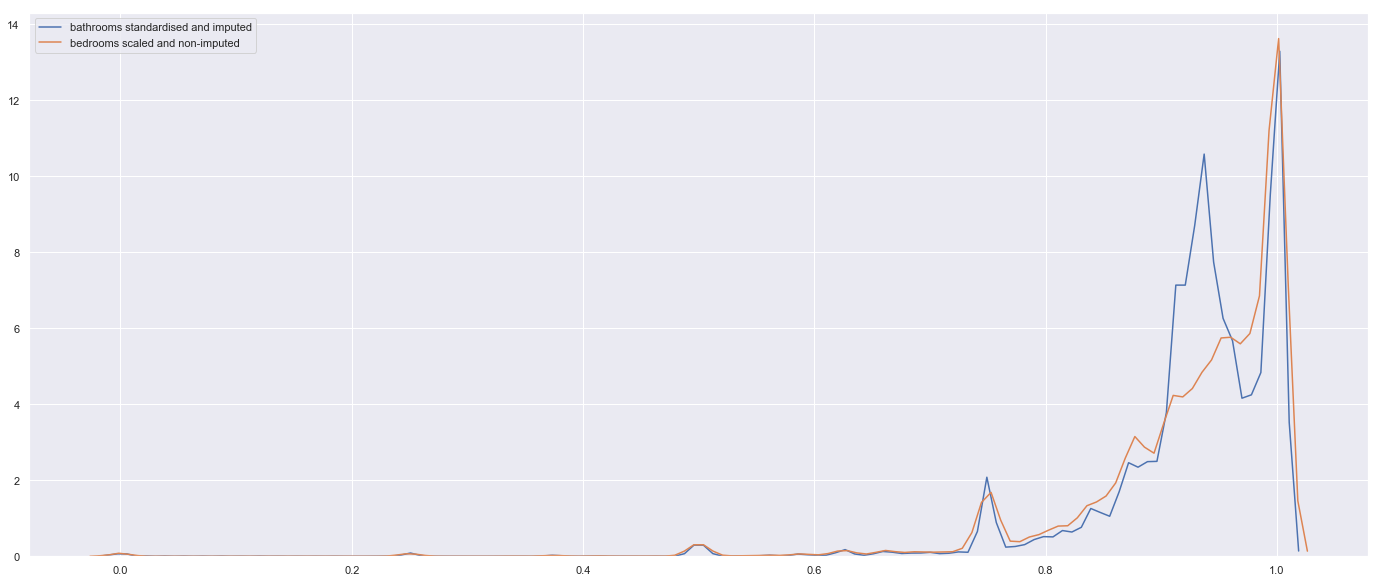

In [0]:
# check the distributions now

sns.set(rc={'figure.figsize':(24,10)})

sns.kdeplot(air_bnb_with_null.loc[:,"review_scores_rating"], label="bathrooms standardised and imputed")
sns.kdeplot(air_bnb_scaled.loc[:,"review_scores_rating"], label="bedrooms scaled and non-imputed")

plt.legend()
plt.show()

# imputing `host_response_rate` column

In [0]:
air_bnb_with_null.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 74111 entries, 6901257 to 3534845
Data columns (total 8 columns):
log_price               74111 non-null float64
accommodates            74111 non-null float64
bathrooms               74111 non-null float64
host_response_rate      55812 non-null float64
number_of_reviews       74111 non-null float64
review_scores_rating    74111 non-null float64
bedrooms                74111 non-null float64
beds                    74111 non-null float64
dtypes: float64(8)
memory usage: 5.1 MB


In [0]:
# from sklearn.model_selection import train_test_split
host_x_train, host_x_test, host_y_train, host_y_test = train_test_split(air_bnb_without_null.loc[:,["log_price","accommodates","bathrooms","number_of_reviews","bedrooms","beds","review_scores_rating"]],
                                                                        air_bnb_without_null.loc[:,"host_response_rate"],
                                                                        test_size=0.2)

In [0]:
appropriate_k(x_train=host_x_train,x_test=host_x_test,y_train=host_y_train,y_test=host_y_test,k_max=273)

200

In [0]:
# creating train and test sets


host_train_x = air_bnb_without_null.loc[:,["log_price","accommodates","bathrooms",
                                           "number_of_reviews","bedrooms","beds","review_scores_rating"]]
host_train_y = air_bnb_without_null.loc[:,"host_response_rate"]


host_test = air_bnb_with_null.loc[:,["log_price","accommodates","bathrooms",
                                     "number_of_reviews","bedrooms","beds","review_scores_rating"]]

In [0]:
print(host_train_x.shape)
print(host_train_y.shape)
print(host_test.shape)

(47787, 7)
(47787,)
(74111, 7)


In [0]:
host_pred = get_knn_predictions(x_train=host_train_x,y_train=host_train_y,x_test=host_test,n_neigh=200)

In [0]:
host_test.loc[:,"host_response_rate"] = host_pred

In [0]:
air_bnb_with_null.loc[:,"host_response_rate"].fillna(host_test.loc[:,"host_response_rate"], inplace=True)

In [0]:
air_bnb_with_null.isnull().sum()

log_price               0
accommodates            0
bathrooms               0
host_response_rate      0
number_of_reviews       0
review_scores_rating    0
bedrooms                0
beds                    0
dtype: int64

# rescaling to original and saving the dataframe

In [0]:
air_bnb_columns = list(air_bnb_num.columns.values)
air_bnb_columns.remove("id")
air_bnb_columns

['log_price',
 'accommodates',
 'bathrooms',
 'host_response_rate',
 'number_of_reviews',
 'review_scores_rating',
 'bedrooms',
 'beds']

In [0]:
# air_bnb_with_null.drop("id", axis=1, inplace=True)
air_bnb_with_null.head()

,log_price,accommodates,bathrooms,host_response_rate,number_of_reviews,review_scores_rating,bedrooms,beds
id,,,,,,,,
6901257,0.659259,0.133333,0.125,0.9395,0.003306,1.000000,0.1,0.055556
6304928,0.674951,0.400000,0.125,1.0000,0.009917,0.912500,0.3,0.166667
7919400,0.654799,0.266667,0.125,1.0000,0.016529,0.900000,0.1,0.166667
13418779,0.871016,0.200000,0.125,0.9463,0.000000,0.933417,0.2,0.111111
3808709,0.624300,0.066667,0.125,1.0000,0.006612,0.250000,0.0,0.055556


In [0]:
air_bnb_num_imputed = pd.DataFrame(data=normalizer_max.inverse_transform(air_bnb_with_null),
                              columns=air_bnb_columns,
                              index=air_bnb_num["id"])
air_bnb_num_imputed.head()

,log_price,accommodates,bathrooms,host_response_rate,number_of_reviews,review_scores_rating,bedrooms,beds
id,,,,,,,,
6901257,5.010635,3.0,1.0,0.9395,2.0,100.000000,1.0,1.0
6304928,5.129899,7.0,1.0,1.0000,6.0,93.000000,3.0,3.0
7919400,4.976734,5.0,1.0,1.0000,10.0,92.000000,1.0,3.0
13418779,6.620073,4.0,1.0,0.9463,0.0,94.673387,2.0,2.0
3808709,4.744932,2.0,1.0,1.0000,4.0,40.000000,0.0,1.0


In [0]:
air_bnb_num.head()

,id,log_price,accommodates,bathrooms,host_response_rate,number_of_reviews,review_scores_rating,bedrooms,beds
0,6901257,5.010635,3,1.0,NaN,2,100.0,1.0,1.0
1,6304928,5.129899,7,1.0,1.0,6,93.0,3.0,3.0
2,7919400,4.976734,5,1.0,1.0,10,92.0,1.0,3.0
3,13418779,6.620073,4,1.0,NaN,0,NaN,2.0,2.0
4,3808709,4.744932,2,1.0,1.0,4,40.0,0.0,1.0


In [0]:
air_bnb_num_imputed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 74111 entries, 6901257 to 3534845
Data columns (total 8 columns):
log_price               74111 non-null float64
accommodates            74111 non-null float64
bathrooms               74111 non-null float64
host_response_rate      74111 non-null float64
number_of_reviews       74111 non-null float64
review_scores_rating    74111 non-null float64
bedrooms                74111 non-null float64
beds                    74111 non-null float64
dtypes: float64(8)
memory usage: 5.1 MB


In [0]:
air_bnb_num_imputed.head(n=10)

,log_price,accommodates,bathrooms,host_response_rate,number_of_reviews,review_scores_rating,bedrooms,beds
id,,,,,,,,
6901257,5.010635,3.0,1.0,0.880,2.0,100.0,1.0,1.0
6304928,5.129899,7.0,1.0,1.000,6.0,93.0,3.0,3.0
7919400,4.976734,5.0,1.0,1.000,10.0,92.0,1.0,3.0
13418779,6.620073,4.0,1.0,0.739,0.0,93.2,2.0,2.0
3808709,4.744932,2.0,1.0,1.000,4.0,40.0,0.0,1.0
12422935,4.442651,2.0,1.0,1.000,3.0,100.0,1.0,1.0
11825529,4.418841,3.0,1.0,1.000,15.0,97.0,1.0,1.0
13971273,4.787492,2.0,1.0,1.000,9.0,93.0,1.0,1.0
180792,4.787492,2.0,1.0,1.000,159.0,99.0,1.0,1.0


In [0]:
air_bnb_num.head(n=10)

,id,log_price,accommodates,bathrooms,host_response_rate,number_of_reviews,review_scores_rating,bedrooms,beds
0,6901257,5.010635,3,1.0,NaN,2,100.0,1.0,1.0
1,6304928,5.129899,7,1.0,1.0,6,93.0,3.0,3.0
2,7919400,4.976734,5,1.0,1.0,10,92.0,1.0,3.0
3,13418779,6.620073,4,1.0,NaN,0,NaN,2.0,2.0
4,3808709,4.744932,2,1.0,1.0,4,40.0,0.0,1.0
5,12422935,4.442651,2,1.0,1.0,3,100.0,1.0,1.0
6,11825529,4.418841,3,1.0,1.0,15,97.0,1.0,1.0
7,13971273,4.787492,2,1.0,1.0,9,93.0,1.0,1.0
8,180792,4.787492,2,1.0,1.0,159,99.0,1.0,1.0
9,5385260,3.583519,2,1.0,1.0,2,90.0,1.0,1.0


In [4]:
air_bnb_num_imputed.loc[:,"actual_price"] = np.exp(air_bnb_num_imputed.loc[:,"log_price"])
air_bnb_num_imputed.head()

,id,log_price,accommodates,bathrooms,host_response_rate,number_of_reviews,review_scores_rating,bedrooms,beds,actual_price
0,6901257,5.010635,3.0,1.0,0.9395,2.0,100.000000,1.0,1.0,150.0
1,6304928,5.129899,7.0,1.0,1.0000,6.0,93.000000,3.0,3.0,169.0
2,7919400,4.976734,5.0,1.0,1.0000,10.0,92.000000,1.0,3.0,145.0
3,13418779,6.620073,4.0,1.0,0.9463,0.0,94.673387,2.0,2.0,750.0
4,3808709,4.744932,2.0,1.0,1.0000,4.0,40.000000,0.0,1.0,115.0


In [0]:
air_bnb_num_imputed.to_csv("drive/My Drive/Colab Notebooks/air_bnb_price_prediction(Kaggle)/Data/air_bnb_num_imputed_engineered.csv")